In [1]:
using GynC
ss=GynC.readsamples("../data/0911");

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/numerik/bzfsikor/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /home/numerik/bzfsikor/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/numerik/bzfsikor/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /home/numerik/bzfsikor/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
  likely near /home/numerik/bzfsikor/.julia/v0.4/Graphs/src/common.jl:3
  likely near /home/numerik/bzfsikor/.julia/v0.4/Graphs/src/dot.jl:80
    promote_rule(Type{Mamba.ScalarLogical}, Type{##276

In [2]:
df=GynC.dataframe(ss)

,sample,data,sigma,adapt,thin,length,unique,tracepropinit,tracepropadapt
1,"Sampling samples: (50000,116) uniques: 13118 config: Config: patient: l10 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l10,0.1,true,100,50000,13118,1.1542383789674993,0.6988490887415458
2,"Sampling samples: (100000,116) uniques: 26055 config: Config: patient: l11 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l11,0.1,true,100,100000,26055,1.1542383789674993,1.2124189676927162
3,"Sampling samples: (100000,116) uniques: 16902 config: Config: patient: l12 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l12,0.1,true,100,100000,16902,1.1542383789674993,1.0734851346268082
4,"Sampling samples: (50000,116) uniques: 6997 config: Config: patient: l13 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l13,0.1,true,100,50000,6997,1.1542383789674993,0.4443552047757105
5,"Sampling samples: (50000,116) uniques: 12121 config: Config: patient: l14 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l14,0.1,true,100,50000,12121,1.1542383789674993,0.7299237605187171
6,"Sampling samples: (50000,116) uniques: 12019 config: Config: patient: l15 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l15,0.1,true,100,50000,12019,1.1542383789674993,0.8052351103708348
7,"Sampling samples: (50000,116) uniques: 10535 config: Config: patient: l16 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l16,0.1,true,100,50000,10535,1.1542383789674993,0.6800661324330105
8,"Sampling samples: (50000,116) uniques: 11920 config: Config: patient: l17 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate

[Plots.jl] Initializing backend: pyplot



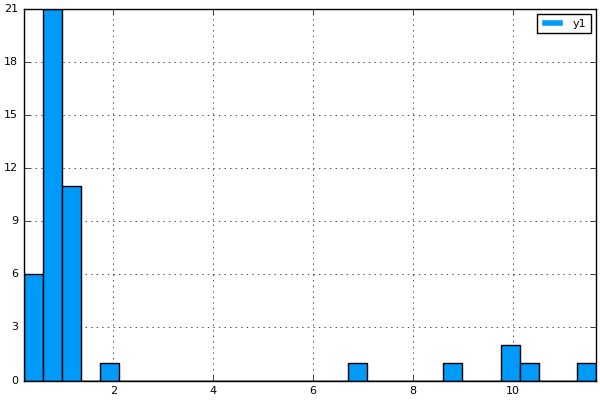

In [3]:
using Plots
histogram(map(s->GynC.propadapt(s)|>trace, ss))


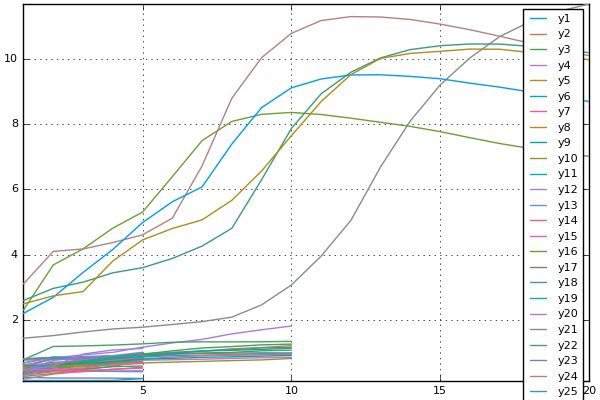

In [4]:
plot(xlabel="")
for p = 1:length(ss)
  traces = map(i ->
        try
            GynC.proposal(ss[p][1:i]) |> trace
        catch
            NaN
        end, (1:20) * 10_000)
  plot!(traces)
end
plot!()

the above plot shows the covariance of the chain.
we can observe, that the speed of computation seems to correlate with the covariance (its trace).
tests showed that neither the ide integration nor the cholesky decomposition times differ significantly.

In [3]:
slow = df[df[:length] .== 50000,:];

In [4]:
fast = df[df[:length] .== 200000,:];

In [ ]:
for d = [slow, fast]
    s = d[2,1]
    Profile.clear()
    @profile GynC.sample!(s, 100)
    Profile.print(C=true,maxdepth=5)
    println("delim")
end

In [ ]:
for s = [fast[5,:sample], slow[5,:sample]]
    spls = s.samples[40000:1000:50_000,:]
    Profile.clear()
    lhs = @profile [begin
        x = spls[i, :] |> vec
        GynC.llh(s.config, x) 
        end
        for i=1:size(spls,1)]
    
    Profile.print()
    println(sum(lhs.==-Inf), mean(lhs), length(lhs))
end


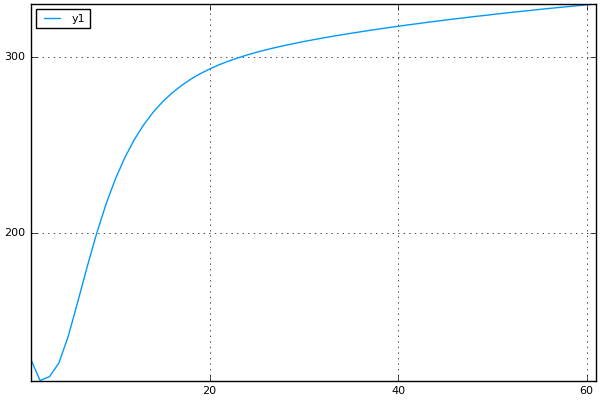

  0.002559 seconds (1.88 k allocations: 80.688 KB)
GynC.llh(s.config,x) = -0.0
llh-0.0.


In [126]:
using Plots

function test(s::GynC.Sampling, sidx=1000)
    sol = @time GynC.forwardsol(s.samples[sidx,:] |> vec, 0:60)
    p=plot(sol[:,GynC.measuredinds[3]])
    display(p)
    #@show x = s.samples[sidx,:] |> vec
    @show GynC.llh(s.config, x)
    println("llh", GynC.llh(s.config, s.samples[sidx,:] |> vec), ".")
end

test(fast[1,1])
#test(slow[1,1])

In [127]:
s = fast[1,1]
periods = 2
t=GynC.meastimes(size(GynC.data(s),1), periods, GynC.period(x))
perm = sortperm(t)
y=GynC.forwardsol(x, t[perm])[invperm(perm), GynC.measuredinds]

sre = 0.

for p=0:periods-1
    @show periodtimes = (1:31) + 31*p
    sre += GynC.l2(GynC.data(s), y[periodtimes, :])
    println(sre)
end
@show -1/(2*s.config.sigma_rho^2) * sre
println(sre)

GynC.llh(s.config, x)

periodtimes = (1:31) + 31p = 1:31
0.0
periodtimes = (1:31) + 31p = 32:62
0.0
(-1 / (2 * s.config.sigma_rho ^ 2)) * sre = -0.0
0.0


-0.0

In [137]:
s

Sampling
  samples: (200000,116)
  uniques: 49386
  config:  Config:
 patient: l24
 sigma:   0.1
 tr(initprop): 1.1542383789674993
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}

In [151]:
df[:datapoints] = [sum(!isnan(GynC.data(df[i,1]))) for i=1:size(df,1)]

45-element Array{Int64,1}:
 64
 68
 71
 71
 63
 63
 68
 68
 76
 60
 60
 64
 68
  ⋮
 72
  0
 63
 64
 64
 71
 55
 68
 63
 48
 67
 63

In [152]:
df

,sample,data,sigma,adapt,thin,length,unique,tracepropinit,tracepropadapt,datapoints
1,"Sampling samples: (50000,116) uniques: 13118 config: Config: patient: l10 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l10,0.1,true,100,50000,13118,1.1542383789674993,0.6988490887415458,64
2,"Sampling samples: (100000,116) uniques: 26055 config: Config: patient: l11 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l11,0.1,true,100,100000,26055,1.1542383789674993,1.2124189676927162,68
3,"Sampling samples: (100000,116) uniques: 16902 config: Config: patient: l12 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l12,0.1,true,100,100000,16902,1.1542383789674993,1.0734851346268082,71
4,"Sampling samples: (50041,116) uniques: 7001 config: Config: patient: l13 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l13,0.1,true,100,50000,6997,1.1542383789674993,0.4443552047757105,71
5,"Sampling samples: (50000,116) uniques: 12121 config: Config: patient: l14 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l14,0.1,true,100,50000,12121,1.1542383789674993,0.7299237605187171,63
6,"Sampling samples: (50000,116) uniques: 12019 config: Config: patient: l15 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l15,0.1,true,100,50000,12019,1.1542383789674993,0.8052351103708348,63
7,"Sampling samples: (50000,116) uniques: 10535 config: Config: patient: l16 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l16,0.1,true,100,50000,10535,1.1542383789674993,0.6800661324330105,68
8,"Sampling samples: (50000,116) uniques: 11920 config: Config: patient: l17 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.Mixture

In [153]:
df[21,:]

,sample,data,sigma,adapt,thin,length,unique,tracepropinit,tracepropadapt,datapoints
1,"Sampling samples: (200041,116) uniques: 45088 config: Config: patient: l29 sigma: 0.1 tr(initprop): 1.1542383789674993 adapt: true thin: 100 init: 4858380976513133059 prior: Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}",l29,0.1,true,100,200000,45088,1.1542383789674993,11.673788157516807,63



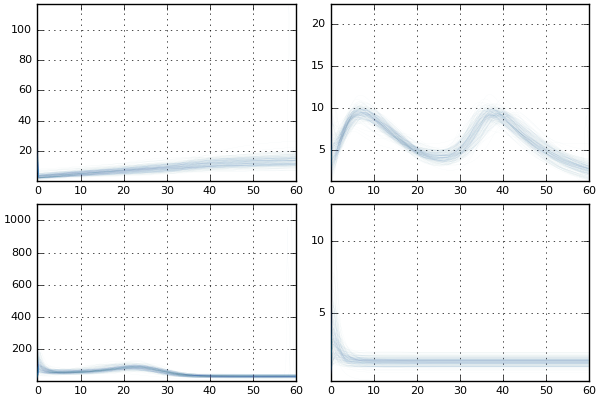

In [155]:
plotsolutions(df[21,1][1:1000:200000])


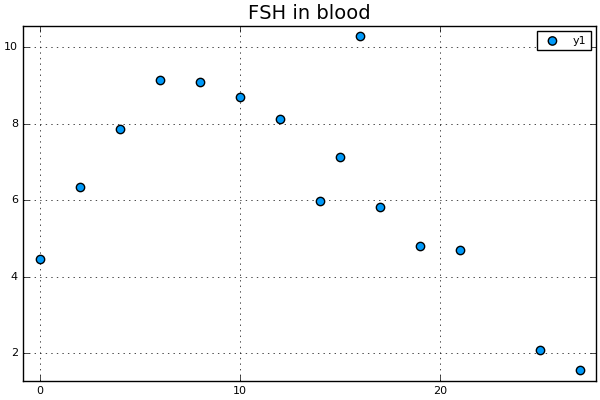

In [160]:
plotdata(df[21,1], 2)

In [166]:
s = df[15,1]
GynC.llh(s.config, s.samples[50000,:]|> vec)

-35.203715229188475

In [ ]:
llh(s) = pmap(x -> GynC.llh(s.config, x), [s.samples[k, :] |> vec for k in 1:size(s.samples, 1)])  

L=Float64[llh(df[p,1][i])[1] for i=[1:1000:50000], p=1:20]


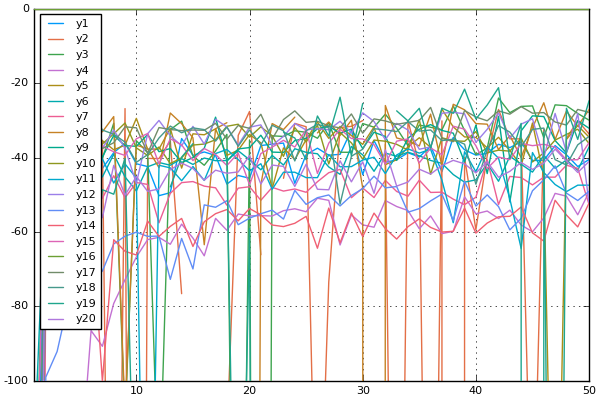

In [202]:
plot(L,yaxis=([-100,0]))

these bumps... how does it find back to probable regions / why are there -inf solutions accepted...